In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
from astropy import constants as const
from astropy import units as u

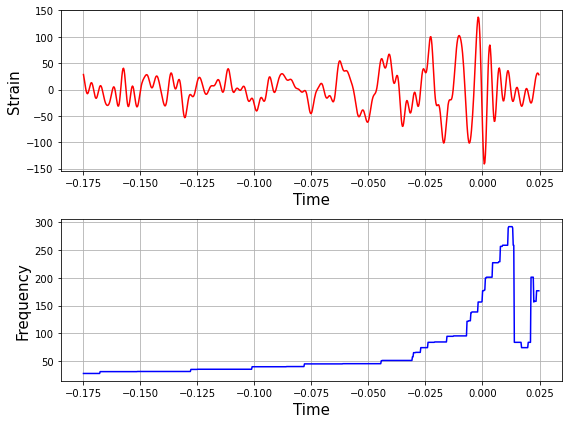

In [2]:
data, freq, time = np.loadtxt('GW_data_file.csv',delimiter=',')

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(time, data, 'r')
plt.grid()
plt.ylabel('Strain',size=15)
plt.xlabel('Time',size=15)
plt.subplot(2,1,2)
plt.plot(time, freq, 'b' )
plt.grid()
plt.ylabel('Frequency',size=15)
plt.xlabel('Time',size=15)
plt.tight_layout()

The weird thing about the frequency graph is that it increases monotonically but in intrevals of constant frequency. After this there is a sudden peak in the graph which then decreases.

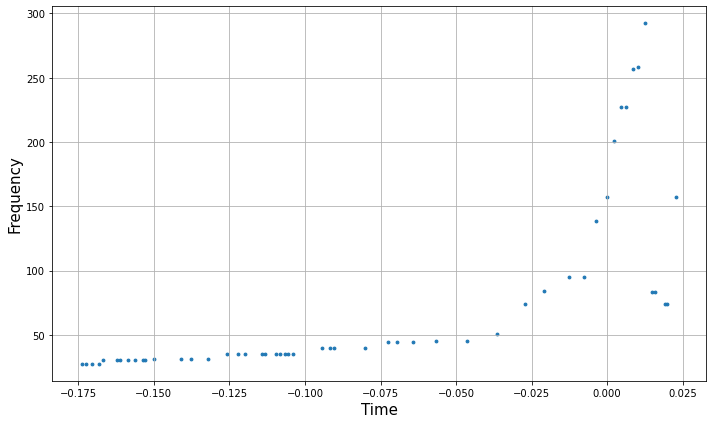

In [3]:
#plotting frequency for zero crossing
for i in range(len(data)):
    zero_crossings = np.where(np.diff(np.sign(data)))[0] #gives index of element before zero crossing
index = zero_crossings + 1
index1 = np.zeros(len(index))
j=0
for i in range(len(index)):
    if time[index[i]] < 0 and freq[index[i]] < 50:
        index1[j] = index[i]
        j=j+1
index1 = index1.astype(int)

plt.figure(figsize=(10,6))
plt.scatter(time[index], freq[index], s=8)
plt.grid()
plt.ylabel('Frequency',size=15)
plt.xlabel('Time',size=15)
plt.tight_layout()


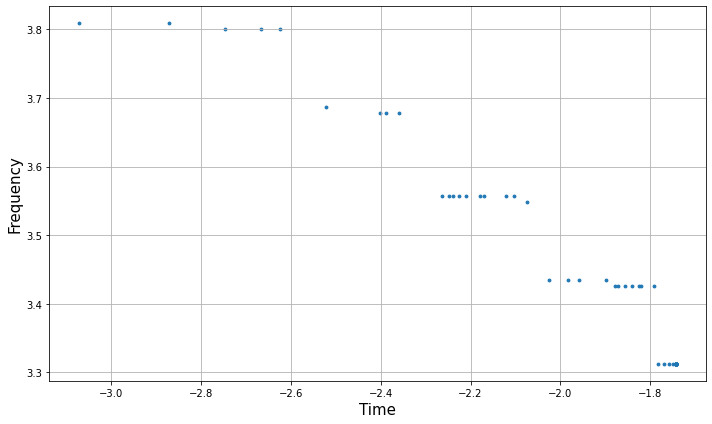

In [4]:
#plotting frequency for t<tc and f<50hz in log scale
plt.figure(figsize=(10,6))
plt.scatter(np.log(-time[index1]), np.log(freq[index1]), s=8)
plt.grid()
plt.ylabel('Frequency',size=15)
plt.xlabel('Time',size=15)
plt.tight_layout()
plt.show()


[40.46694052]


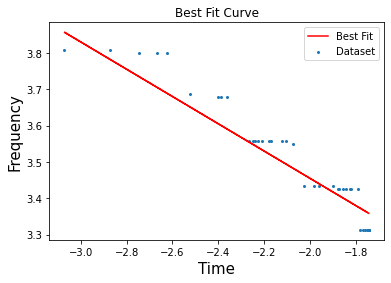

In [5]:
#finding chirp mass m and best fit curve
def logf(t,m):
    return (-3/8)*((8/3)*np.log(8*np.pi) - np.log(5) + (5/3)*(np.log((m*const.G.value)/(const.c.value**3))) + np.log(-t))

p_opt, p_cov = cf(logf, time[index1], np.log(freq[index1]))
print(p_opt/const.M_sun.value) #chirp mass in solar mass terms

plt.scatter(np.log(-time[index1]), np.log(freq[index1]), s=4, label='Dataset')
plt.plot(np.log(-time[index1]),logf(time[index1],p_opt),'r',label='Best Fit')
plt.xlabel("Time", size=15)
plt.ylabel("Frequency", size=15)
plt.title('Best Fit Curve')
plt.legend()
plt.show()
